# O Problema do Caxeiro Viajante

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 02/05/2025

$\quad$ O presente `Notebook` tem como objetivo introduzir o Problema do Caxeiro Viajante (TSP - Travelling Salesman Problem), junto com a apresentação de 3 método diferentes para a resolução do mesmo, sendo eles: O Método do Vizinho Mais Proximo (Nearest Neighbor), o método Simulated Annealing e o método Self-Organizing Maps. Por sua própria natureza como um problema de otimização, o Problema do Caxeiro Viajante acaba tendo uma relação bem direta com a física, sobretude no contexto do desenvolvimentos dos seus métodos de solução. O `Notebook` será dividido da seguinte forma:

1. Introdução
2. Métodos de Solução
    - 2.1  Nearest Neighbor
    - 2.2 Simulated Anneling
    - 2.3 Self-Orgazing Maps
5. Conclusão

## Pré-requisitos

$\quad$ Para acompanhar o desenvolver dos códigos presentes neste `Notebook`, é necessário apenas um breve conhecimento de programação. Mesmo no caso do Simulated Annealing e Self-Organizing Maps que exigem uma sofisticação maior, pode-se ter uma intuição geral apenas observando o código e suas explicações. 

## Importando bibliotecas

In [1]:
import numpy as np # Processsos gerais.
import matplotlib.pyplot as plt # Plots.
from random import random, randrange # Simular comportamentos aleatórios.
import matplotlib.animation as animation # Utilizada na animação.

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Thu May 01 12:47:54 2025 Hora oficial do Brasil

## 1. Introdução

$\quad$ O enunciado do Problema do Caxeiro Viajente é bem simples: dado um conjunto de cidades (normalmente num plano), qual é a trajetória de menor distância entre as cidades, de forma que cada cidade seja visitada uma única vez? Pense que uma cidade está sendo adotada como marco zero, de onde, a partir dela, sairemos em uma viagem, passando por todas as outras cidades uma única vez, e no fim retornando para essa cidade inicial. Um enunciado aparentemente simples, mas que esconde uma complexidade de solução inacreditável. Classificado como NP-hard, o número de sequências de soluções possíveis cresce exponencialmente com o número de cidades.

$\quad$ O Problema do Caxeiro Viajante é um clássico problema de otimização da matemática, sendo altamente aplicável no setor de logística. Além disso, os seus métodos de solução acabam sendo influenciados pela física. Durante esse `Notebook`, veremos 3 métodos diferentes de solução para esse problema. Para tal, vamos definir uma configuração inicial de cidades, geradas aleatoriamente num plano.

In [3]:
N = 40 # Número de cidades.
L = 100 # Largura do plano considerado.

np.random.seed(10)  # Para reprodutibilidade.
cidades = np.random.rand(N+1, 2) * L  # Coordenadas entre 0 e 100.
cidades[N] = cidades[0] # A última cidade do vetor é a cidade inicial.

## 2.  Métodos de Solução

## 2.1 Nearest Neighbor

$\quad$ Iniciaremos com um método bem óbvio para a resolução desse problema, que naturalmente terá uma eficiência limitada. A lógica do método do Vizinho mais Próximo é simples: escolhemos uma cidade para sair (no nosso caso, adotaremos a cidade inicial do vetor), onde a partir dela calculamos qual cidade é a sua vizinha mais próxima, escolhendo tal cidade como nosso próximo destino. Chegando nessa nova cidade, repetimos o processo. À medida que vamos caminhando, excluiremos as cidades já visitadas do conjunto de cidades possíveis, do contrário ficaríamos indo e voltando ente duas cidades. Assim, definimos a função:

In [4]:
def nearest_neighbor(cidades_NN):
    n = cidades_NN.shape[0] # Número de cidades... N + 1, contando a cidade inicial duas vezes.
    visitados = [0]  # Começamos na cidade 0.
    total_distance = 0.0 # Variável para armazenar a distância total no caminho.

    quadros_NN = [visitados.copy()] # Lista que armazenará passos da solução, depois sendo utilizada para gerar um gif.
    while len(visitados) < n: # Rodar enquanto o tamanho do vetor visitados for menor do que o número total de cidades
        cidade_atual = visitados[-1] # Cidade atual do looping é sempre a última do vetor, que foi sempre adicionada no passo anterior do looping.
        não_visitados = [i for i in range(n) if i not in visitados] # Vetor dos índices da cidades ainda não visitadas.
        distancias = [np.linalg.norm(cidades_NN[cidade_atual] - cidades_NN[i]) for i in não_visitados] # Vetor com as distancias entre a cidade atual e todas as outras possíveis.
        nearest = não_visitados[np.argmin(distancias)] # Indice da cidade que tem a menor distancia.
        visitados.append(nearest) # Adicionar o índice da menor cidade às cidades visitadas.
        total_distance += min(distancias) # Soma à distância total o percurso até a próxima cidade. 
        quadros_NN.append(visitados.copy()) # Adicionar o atual estado do vetor com os índices à um outro vetor, que depois será utilizado para fazer uma animação.
    
    total_distance += np.linalg.norm(cidades_NN[visitados[-1]] - cidades_NN[visitados[0]])
    visitados.append(visitados[0]) # Voltar à cidade inicial
    quadros_NN.append(visitados.copy())

    return visitados, total_distance, quadros_NN

$\quad$ Resolvendo o problema, considerando a disposição inicial de cidades que definimos ainda na introdução.

In [5]:
cidades_NN = cidades.copy()
ordem_visita, distancia_total_NN, quadros_NN = nearest_neighbor(cidades_NN)

$\quad$ Plotando a solução

Ordem das cidades visitadas: [0, 40, 26, 29, 16, 39, 28, 15, 7, 9, 38, 1, 20, 30, 5, 27, 23, 21, 18, 3, 34, 22, 11, 36, 31, 13, 14, 12, 2, 10, 25, 37, 24, 4, 17, 33, 32, 35, 6, 19, 8, 0]
Distância total percorrida: 578.72


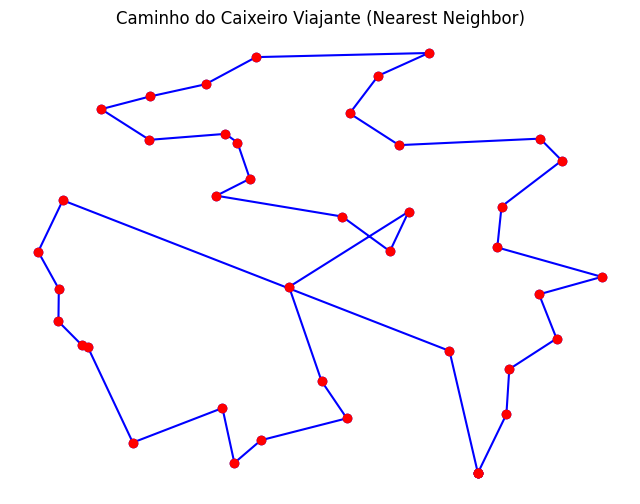

In [6]:
print("Ordem das cidades visitadas:", ordem_visita)
print(f"Distância total percorrida: {distancia_total_NN:.2f}")

# Plotar o caminho
plt.figure(figsize=(8, 6))
plt.plot(cidades_NN[ordem_visita, 0], cidades_NN[ordem_visita, 1], 'o-', color='blue') # Plotar cada caminho entre as cidades vizinhas, seguindo a ordem descrita pela variável ordem_visita.
plt.plot(cidades_NN[ordem_visita, 0], cidades_NN[ordem_visita, 1], 'o', color='red')
plt.title('Caminho do Caixeiro Viajante (Nearest Neighbor)')
plt.axis('off')
plt.show()

$\quad$ O seguinte código gera um gif da evolução temporal da trajetória.

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

def atualizar_SA(i): # Função que definide cada quadro i da animação.
    ax.clear()
    ax.axis('off')
    ax.plot(cidades_NN[quadros_NN[i], 0], cidades_NN[quadros_NN[i], 1], 'o-', color='blue')
    ax.plot(cidades_NN[quadros_NN[-1], 0], cidades_NN[quadros_NN[-1], 1], 'o', color='red')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title(f'Progresso {(i/len(quadros_NN)*100):.0f}%')
    ax.grid(True)

ani = animation.FuncAnimation(fig, atualizar_SA, np.arange(len(quadros_NN)), interval=150)
plt.close(fig)
ani.save('Nearest_Neighbor.gif', writer='pillow', dpi=80)

![nearest_neighbor](https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExNGYwZjhyYzR4Z3VpdjQzdTRuc2xheTdweWQ5NHRjNnE3OHp2Y2d2MyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/EG56gPpzhe10J0XRoO/giphy.gif)

## 2.2 Simulated Annealling


$\quad$ Proposto por Scott Kirkpatrick em 1985, o método Simulated Annealing tem sua base na física estatística. O primeiro passo no método Simulated Annealing é estabelecer uma trajetória inicial, que no nosso caso será: sair do elemento **r[0]**, passar pelo elemento **r[1]**, depois pelo **r[2]**, até o elemento **r[N-1]** (que será novamente a cidade inicial). Tal caminho terá uma distância total percorrida associada. Após calcular e armazenar essa distância, nós realizaremos uma comutação entre dois elementos aleatórios do vetor de cidades, cujo alteração resultará numa nova distância total percorrida. Nesse ponto, realizaremos uma condicional, onde: caso a nova distância seja menor, aceitaremos ela imediatamente; caso a nova distãncia seja maior, nós aceitaremos ela com a probabilidade de Boltzzman

$$P(\Delta D) = e^{\frac{-\Delta D}{T}}, \tag{1}$$

onde $\Delta D$ é a diferença entre o tamanho da trajetória nova e a anteior. Essa última condição nos dá uma maior probabilidade de escapar de mínimos locais, o que poderia não acontecer caso sempre rejeitássemos trajetórias que aumentam a distãncia total. O $T$ na equação **(1)** representa o temperatura atual do sistema. É certo que não estamos falando de temperatura no sentido físico, mas sim numa forma generalizada.   

$\quad$ Essa temperatura tem um papel bem importante na convergência do método. Podemos observar na equação **(1)** que quanto maior o valor de $T$, maior será a probabilidade de aceitação de um estado com maior energia (pode-se pensar que o sistema está "agitado"). Assim, se a temperatura for mantida num valor consideravelmente alto, o sistema oscilará bastante, não convergindo nunca. Do contrário, se a temperatur $T$ for baixa, a probabilidade de aceitação de um estado com maior energia será quase nula, configurando um sistema estável. A estratégia do Simulated Annealing é iniciar o sistema com uma temperatura consideravelmente alta e ir diminuindo-a constantemente, de tal forma que o sistema convergirá para um mínimo (global ou mesmo local, já que o método não garante uma convergência absoluta) de energia. Na implementação do código, utilizaremos um decaimento exponencial da temperatura, de tal forma que  

$$ T = T_0e^{-\frac{t}{\tau}},$$

onde $T_0$ é a temperatura inicial e $\tau$ um parâmetro que controla a velocidade de decaimento. Quanto maior o valor de $\tau$, mais lentamente a temperatura diminuirá.

$\quad$ Para cada para de cidades, teremos que calcular a distância euclidiana entre elas. Assim, vamos definir uma função que calcula essa distância entre duas cidades. Juntamente, definiremos uma função que, dado o vetor com todas as cidades, calcula a distância total seguindo o caminho anteriomente definido (seguindo a ordem natural de organização do vetor).

In [8]:
def mag(x):
    return np.sqrt(x[0]**2+x[1]**2) # Distancia euclidiana.

def distance(r): # Função para calcular a distância, dado um possível caminho entre as cidades.
    s = 0.0
    for i in range(N):
        dist = r[i+1]-r[i]
        s+=mag(dist)
    return(s)

$\quad$ Assim já podemos definir o corpo do código em si: a função que vai receber o vetor com a trajetória inicial, e retornar uma trajetória otimizada.


In [9]:
def evoluir(cidades_SA, N, Tmin, tau):
    Tmax = 10.0 # Temperatura inicial

    t = 0 # Tempo inicial
    T = Tmax
    quadros_SA = [cidades_SA.copy()] # Quadros para o gif desse método.
    distancias = [distance(cidades_SA)] # Vetor com as distâncias em cada evolução. 
    
    D = distance(cidades_SA)
    o = 0
    while(T>Tmin):
        t+=1 # Incremento de tempo.
        T = Tmax*np.exp(-t/tau) # Atualização do valor da temperatura.

        c1, c2 = randrange(1,N),randrange(1,N) # Realizar a comultação entre 2 elementos.
        cidades_SA[[c1, c2]] = cidades_SA[[c2, c1]]
        Dnew = distance(cidades_SA) 
        dDist = Dnew-D # Variação da distância.
        if (random()<np.exp(-dDist/T)): # Condicional com a probabilidade de Boltzmann.
            D = Dnew 
            if o%50 == 0: # Armazenar apenas alguns quadros.
                quadros_SA.append(cidades_SA.copy())
        else:
            cidades_SA[[c1, c2]] = cidades_SA[[c2, c1]] # Caso a mudança não seja aceita, desfazemos a troca.
        
        distancias.append(D)    
        o+=1
        
    return cidades_SA, quadros_SA, distancias

$\quad$ Definida a função, podemos fornecer a condição inicial anteriormente definida e obter o caminho otimizado, passando como argumento os devidos parâmetros.

In [10]:
cidades_SA = cidades.copy()

cidades_SA, quadros_SA, distancias_SA = evoluir(cidades_SA, N, 1, 0.2*1e5) # Otimizar a trajetória.
distancia_total_SA = distancias_SA[-1] # A distância total na trajetória otimizada será o último elemento (mais atualizado) desse array.

$\quad$ Print da trajetória inicial (aleatoria) e a final (depois da otimização), junto com um gráfico da convergência do método:

Text(0.5, 1.0, 'Distância total da rota em função dos passos')

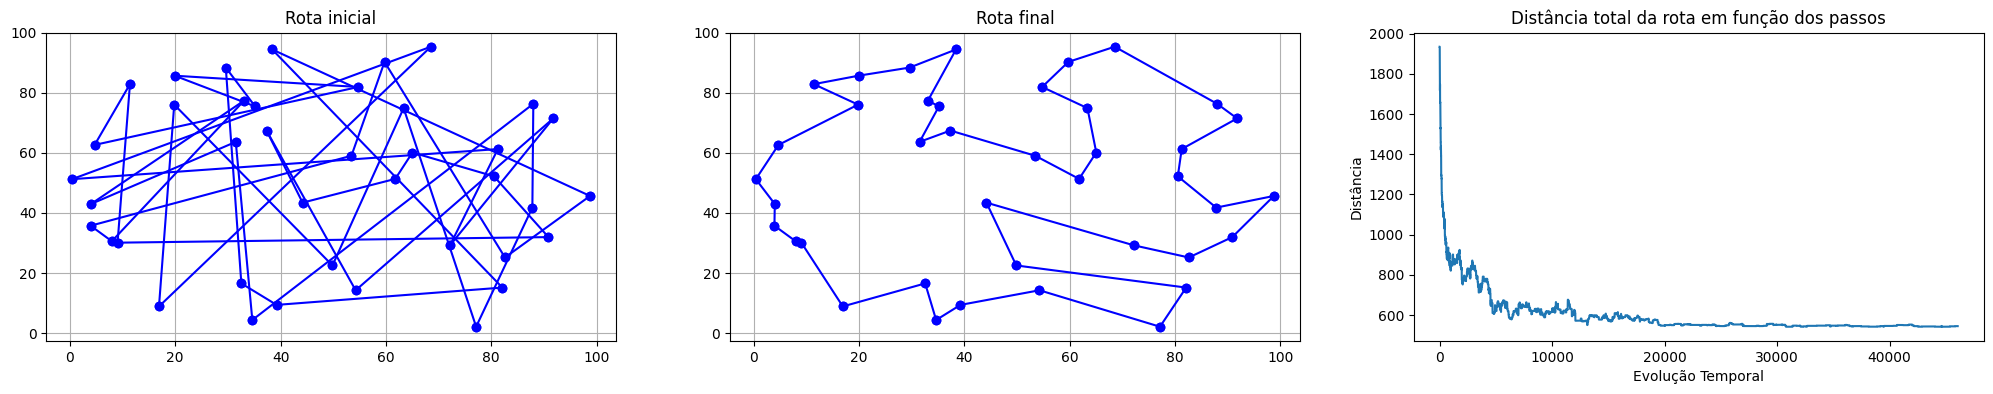

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

rotas = [quadros_SA[0], quadros_SA[-1]]
titulos = ["Rota inicial", "Rota final"]

for idx, rota in enumerate(rotas):
    for i in range(N):
        x1, y1 = rota[i]
        x2, y2 = rota[(i + 1) % N]  # conecta com o próximo, fecha o ciclo
        axes[idx].plot([x1, x2], [y1, y2], 'bo-')
        axes[idx].plot(x1, y1, f'C{i + 1}')
    axes[idx].grid(True)
    axes[idx].set_title(titulos[idx])

axes[2].plot(distancias_SA)
axes[2].set_xlabel("Evolução Temporal")
axes[2].set_ylabel("Distância")
axes[2].set_title("Distância total da rota em função dos passos")

$\quad$ O seguinte código é dedicado apenas à definição de uma animação, onde podemos analisar visualmente a convergência da trajetória.

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

def atualizar_SA(i):
    ax.clear()
    ax.axis('off')
    cidades_quadro = quadros_SA[i]
    ax.plot(cidades_quadro[:, 0], cidades_quadro[:, 1], 'o-', color = 'blue', label='Caminho')
    ax.plot(cidades_quadro[:, 0], cidades_quadro[:, 1], 'o', color='red' , label='Cidades')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title(f'Progresso {(i/len(quadros_SA)*100):.0f}%')
    ax.legend()
    ax.grid(True)

ani = animation.FuncAnimation(fig, atualizar_SA, np.arange(len(quadros_SA)), interval=10)
plt.close(fig)
ani.save('Simulated_Annealing.gif', writer='pillow', dpi=80)

![simulated_annealing](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExb2lnYjltdjlheGpoMnB1dzBzYWFkNjF0bTZnbmRrdWllNDZ5YzFldSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/kUdaLGJOMLgwySQZZF/giphy.gif)

$\quad$ O Simulated Annealing é um método de melhora de trajetória. Isso significa que, quanto melhor a trajetória inicial, a tendência é ou uma convergência mais rápida ou/e um output melhor no final dos passos. Assim, caso quisessemos melhorar a velocidade de convergência ou a acurária do Simulated Annealing aplicado ao PCV, poderíamos primeiro utilizar o método do Vizinho Mais Próximo (que tem custo computacional extremamente baixo) fornecer um caminho inicial mais otimizado do que quando o tomamemos de maneira aleatória.

## Self-Organizing Maps

$\quad$ O terceiro e último método é de uma sofisticação considerável, justamente por ser baseada em técnicas de apredizado não supervisionado. Tendo sido proposto inicialmente nos anos 80, o método Self-Organizing Maps pode ser definido como um conjunto de neuronios, que, iniciados numa dada disposição, vão aos poucos convergindo às posições das cidades. A convergência se baseia em: similaridade e influência entre os neuronios. O primeiro ponto, de similaridade, faz com que um neurônio tenda a convergir para cidade mais próxima dele, e não para qualquer outra cidade arbitrária mais distante. O segundo ponto, de influência entre os neurônios, causa uma interação que, além do neurônio vencedor convergir para uma dada cidade, ele também influenciará diretamente a convergência de neuronios próximos, dentro de um raio efetivo de interação. Para garantir a convergência do método, esse raio de interação vai diminuindo com o tempo. (Para mais informações sobre o método, recomenda-se a leitura da referência **[2]**).

$\quad$ Definindo as constantes do método, junto com a disposição inicial dos neuronios:

In [13]:
cidades_SOM = cidades.copy()
num_neuronios = 10 * N  # Mais neurônios do que cidades.
num_epocas = 2000 
alpha_inicial = 0.8 # Taxa de aprendizado inicial.
raio_inicial = num_neuronios // 2 # Raio de interação???
decaimento_constante = num_epocas / np.log(raio_inicial) # Parâmetro para o decaimento do raio.

# Inicializar neurônios em um círculo
theta = np.linspace(0, 2*np.pi, num_neuronios, endpoint=False)
neuronios = np.column_stack((L*np.cos(theta), L*np.sin(theta))) * 0.5 + L//2  # Inicializa os neuronios num círculo

# Função de distância euclidiana
def distancia(a, b):
    return np.linalg.norm(a - b, axis=1)

$\quad$ Definindo o corpo principal do código:

In [14]:
quadros_SOM = [neuronios.copy()] # Para armazenar os quadros em cada tempo.
# Treinamento SOM
for epoca in range(num_epocas):
    cidade_idx = np.random.randint(N) # Sorteia um índice para uma cidade.
    cidade = cidades_SOM[cidade_idx] # Cidade equivalente ao índice sorteado.
 
    # Encontrar neurônio vencedor
    distancias = distancia(neuronios, cidade) # Vetor com a distância entre cada neuronio e a cidade sorteada.
    vencedor_idx = np.argmin(distancias) # O neurônio vencedor será aquele de menor distância.

    # Decaimento dos parâmetros
    alpha = alpha_inicial * np.exp(-epoca / num_epocas) # Diminuir a taxa de aprendizado.
    raio = raio_inicial * np.exp(-epoca / decaimento_constante) # Diminuir o raio de influência.

    # Atualizar a posição dos neurônios.
    for i in range(num_neuronios):
        # Distância circular entre os neurônios (SOM é um anel).
        delta = min(abs(i - vencedor_idx), num_neuronios - abs(i - vencedor_idx))
        if delta < raio:
            influencia = np.exp(-delta**2 / (2 * (raio**2)))
            neuronios[i] += alpha * influencia * (cidade - neuronios[i])
    
    # Para a animação.
    if epoca % 10 == 0:  
        quadros_SOM.append(neuronios.copy())


$\quad$ O caminho final (que minimiza a distância precorrida segundo o atual método) será obtida com base na disposição espacial final do

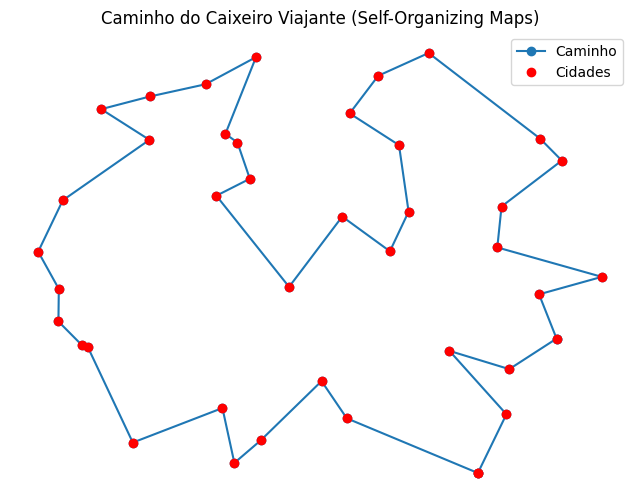

In [15]:
caminho = []
for cidade in cidades:
  dist = distancia(neuronios, cidade)
  indice = np.argmin(dist)
  caminho.append((indice,cidade))

caminho.sort(key=lambda x: x[0])
caminho = np.array([cidade for _, cidade in caminho])
caminho = np.vstack([caminho, caminho[0]])

distancia_total_SOM = distance(caminho)

plt.figure(figsize=(8, 6))
plt.plot(caminho[:, 0], caminho[:, 1], 'o-', label='Caminho')
plt.plot(cidades[:, 0], cidades[:, 1], 'o', color='red', label='Cidades')
plt.title('Caminho do Caixeiro Viajante (Self-Organizing Maps)')
plt.legend()
plt.axis('off')
plt.show()

$\quad$ Animação da evolução temporal do método

In [16]:
fig, ax = plt.subplots(figsize=(8,8))

def atualizar(frame_idx):
    ax.clear()
    ax.axis('off')
    neuronios_frame = quadros_SOM[frame_idx]
    ax.plot(neuronios_frame[:, 0], neuronios_frame[:, 1], 'o-', label='Neuronios')
    ax.scatter(cidades[:, 0], cidades[:, 1], c='red', label='Cidades')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_title(f'Progresso {(frame_idx/len(quadros_SOM)*100):.0f}%')
    ax.legend()
    ax.grid(True)

ani = animation.FuncAnimation(fig, atualizar, frames=len(quadros_SOM), interval=10)
plt.close(fig)
ani.save('Self_Organizing_Maps.gif', writer='pillow')

![Plot3](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExY3lwZ2RncnM5M25rNTFudHhqMmhtOHJmd2FnY3ZhZzJ3ZnVsbnU1aSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/sw1Rr3LPDbMMSJbSVv/giphy.gif)

$\quad$ O Self-Orgazing Maps acaba não sendo o mais eficiente no quesito de retornar a solução mais otimizada, mas o seu uso é extremamente prático e aconselhável para um problema com muitas cidades, podendo ser usado inclusive na escala de um país.

## Conclusão

$\quad$ Justamente por ser um problema NP-Hard, o Problema do Caxeiro viajante não tem solução analítica absoluta. Na maioria dos contextos, ter um método que aproxima o caminho ideal já tem uma grande utilizada. Como uma conclusão, vamos comparar o valor da distância total obtida pelos 3 métodos.

In [17]:
print("Distância Total")
print(f'     Nearest Neighbor: {distancia_total_NN:.1f}', )
print(f'     Simulated Annealing: {distancia_total_SA:.1f}', )
print(f'     Self-Organizing Maps: {distancia_total_SOM:.1f}')

Distância Total
     Nearest Neighbor: 578.7
     Simulated Annealing: 544.9
     Self-Organizing Maps: 494.2


Onde, pelo menos para os parâmetros dessa simulação, percebemos a classificação de eficiência entre os métodos.

## Referencias

**[1]** *Mark Newman - Computational Physics (2013, University of Michigan)*

**[2]** https://diego.codes/post/som-tsp/#fnref:1